### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [5]:
df = pd.read_csv('/Users/samantha/Desktop/Desktop_MacbookPro/FlatironSchool/section03/PetAdoptionClassification/data/cleaned_df.csv', index_col = 'Unnamed: 0')

In [6]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Animal ID,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,DOB,IntakeDate,IntakeAge,IntakeAgeYrs
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,A384994,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,BAT,BROWN,NaN,2019-03-17,NaN,-1.00
1,NaN,CAT,DOMESTIC SH,CREAM,Female,SMALL,A372719,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,DOMESTIC SH,CREAM,NaN,2018-05-21,NaN,-1.00
2,NaN,OTHER,BAT,BLACK,Unknown,SMALL,A385008,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,BAT,BLACK,NaN,2019-03-18,NaN,-1.00
3,DAISY,CAT,DOMESTIC MH,WHITE/TAN,Spayed,MED,A372551,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,DOMESTIC MH,WHITE,2010-05-15,2018-05-15,2922 days 00:00:00.000000000,8.01
4,NaN,CAT,DOMESTIC SH,CALICO/SEAL PT,Female,SMALL,A375772,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,CALICO,2005-09-04,2018-09-04,4748 days 00:00:00.000000000,13.01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16457 entries, 0 to 16791
Data columns (total 19 columns):
Name                   12450 non-null object
Type                   16457 non-null object
Breed                  16457 non-null object
Color                  16457 non-null object
Sex                    16457 non-null object
Size                   16457 non-null object
Animal ID              16457 non-null object
Days in Shelter        16457 non-null int64
Intake Type            16457 non-null object
Intake Subtype         16457 non-null object
Outcome Type           16457 non-null object
Intake Condition       16457 non-null object
Intake Jurisdiction    16457 non-null object
PredomBreed            16457 non-null object
PredomColor            16457 non-null object
DOB                    12680 non-null object
IntakeDate             16457 non-null object
IntakeAge              12680 non-null object
IntakeAgeYrs           16457 non-null float64
dtypes: float64(1), int64(1), object

In [8]:
df.describe()

,Days in Shelter,IntakeAgeYrs
count,16457.000000,16457.000000
mean,17.153734,2.415546
std,28.458548,3.880925
min,0.000000,-1.000000
25%,1.000000,0.080000
50%,9.000000,0.950000
75%,22.000000,3.770000
max,791.000000,25.950000


In [9]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Animal ID',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Intake Condition', 'Intake Jurisdiction', 'PredomBreed', 'PredomColor',
       'DOB', 'IntakeDate', 'IntakeAge', 'IntakeAgeYrs'],
      dtype='object')

# Feature Engineering

In [10]:
df.drop(['Name','Breed','Color','Animal ID','Intake Subtype', 'DOB','IntakeDate','IntakeAge','IntakeAgeYrs','Intake Condition','Days in Shelter'], axis=1, inplace=True)

In [53]:
df.head(20)

,Type,Sex,Size,Intake Type,Outcome Type,Intake Jurisdiction,PredomBreed,PredomColor
0,OTHER,Unknown,SMALL,QUARANTINE,EUTHANIZE,*SEBASTOPOL,BAT,BROWN
1,CAT,Female,SMALL,STRAY,EUTHANIZE,SANTA ROSA,DOMESTIC SH,CREAM
2,OTHER,Unknown,SMALL,QUARANTINE,EUTHANIZE,SANTA ROSA,BAT,BLACK
3,CAT,Spayed,MED,OWNER SURRENDER,EUTHANIZE,SANTA ROSA,DOMESTIC MH,WHITE
4,CAT,Female,SMALL,STRAY,EUTHANIZE,SANTA ROSA,DOMESTIC SH,CALICO
5,CAT,Neutered,SMALL,STRAY,EUTHANIZE,WINDSOR,DOMESTIC SH,SEAL PT
6,DOG,Neutered,LARGE,OWNER SURRENDER,EUTHANIZE,SANTA ROSA,ROTTWEILER,BLACK
7,CAT,Unknown,KITTN,STRAY,EUTHANIZE,WINDSOR,DOMESTIC SH,BLACK
8,CAT,Unknown,KITTN,STRAY,EUTHANIZE,WINDSOR,DOMESTIC SH,ORANGE
9,DOG,Male,LARGE,OWNER SURRENDER,EUTHANIZE,SANTA ROSA,PIT BULL,GRAY


In [63]:
df['PredomColor'].value_counts()

BLACK        4730
BROWN        3294
WHITE        2137
GRAY         1392
TAN          1333
BLUE          540
ORANGE        446
RED           428
TRICOLOR      415
TORTIE        253
OTHER         242
YELLOW        217
CALICO        184
FAWN          151
SEAL PT       134
LYNX          129
CHOCOLATE     127
BUFF          106
CREAM         103
GOLD           96
Name: PredomColor, dtype: int64

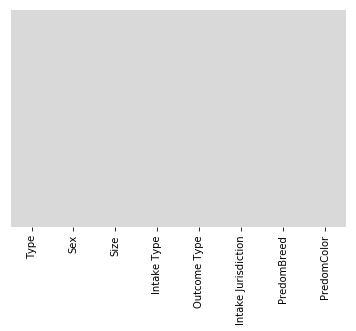

In [12]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [13]:
df.reset_index(drop=True, inplace=True)

## Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [23]:
import pickle

In [15]:
from collections import defaultdict

In [16]:
d = defaultdict(LabelEncoder)

In [18]:
# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
encoded = df.apply(lambda x: d[x.name].transform(x))

In [19]:
testlist = pd.DataFrame(df.iloc[0,:].copy()).T

testlist.apply(lambda x: d[x.name].transform(x))

,Type,Sex,Size,Intake Type,Outcome Type,Intake Jurisdiction,PredomBreed,PredomColor
0,2,4,4,3,1,5,6,2


In [24]:
encoder_pickle_path = 'encoder.pkl'

# Create an variable to pickle and open it in write mode
encoder_pickle = open(encoder_pickle_path, 'wb')
pickle.dump(d, encoder_pickle)
encoder_pickle.close()

In [25]:
modeling = encoded.copy()

In [26]:
modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 8 columns):
Type                   16457 non-null int64
Sex                    16457 non-null int64
Size                   16457 non-null int64
Intake Type            16457 non-null int64
Outcome Type           16457 non-null int64
Intake Jurisdiction    16457 non-null int64
PredomBreed            16457 non-null int64
PredomColor            16457 non-null int64
dtypes: int64(8)
memory usage: 1.0 MB


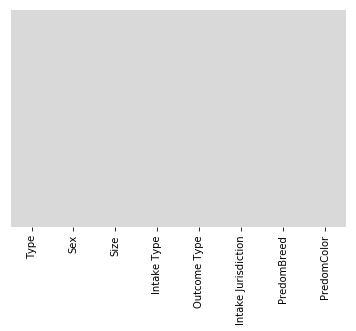

In [27]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

## Interaction Features

In [28]:
features = modeling.drop(['Outcome Type'], axis = 1).copy()

In [29]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [30]:
features = pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names(input_features=features.columns))

In [35]:
poly_pickle_path = 'interaction_maker.pkl'

# Create an variable to pickle and open it in write mode
poly_pickle = open(poly_pickle_path, 'wb')
pickle.dump(poly, poly_pickle)
poly_pickle.close()

In [31]:
features.describe()

,Type,Sex,Size,Intake Type,Intake Jurisdiction,PredomBreed,PredomColor,Type Sex,Type Size,Type Intake Type,Type Intake Jurisdiction,Type PredomBreed,Type PredomColor,Sex Size,Sex Intake Type,Sex Intake Jurisdiction,Sex PredomBreed,Sex PredomColor,Size Intake Type,Size Intake Jurisdiction,Size PredomBreed,Size PredomColor,Intake Type Intake Jurisdiction,Intake Type PredomBreed,Intake Type PredomColor,Intake Jurisdiction PredomBreed,Intake Jurisdiction PredomColor,PredomBreed PredomColor
count,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000
mean,0.722428,2.066962,2.513642,3.445342,9.143890,28.010026,6.928055,1.369630,2.020781,2.468858,6.621134,22.158656,5.668955,5.139697,7.123169,18.881570,56.859877,13.967977,8.614814,23.145531,69.260254,19.044601,31.566628,96.605092,23.856171,256.825545,63.462843,201.205505
std,0.592350,1.114992,1.666012,1.100699,1.397513,12.599100,7.044173,1.627586,2.284181,2.279326,5.534907,22.744486,8.642696,4.898346,4.669493,10.631307,40.974095,17.684853,6.631386,15.996020,56.944013,25.636332,11.219241,55.115894,26.664185,124.665166,66.058703,249.102307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,4.000000,8.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000,30.000000,0.000000,4.000000,8.000000,25.000000,0.000000,30.000000,56.000000,0.000000,176.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,4.000000,10.000000,22.000000,2.000000,1.000000,1.000000,3.000000,8.000000,15.000000,0.000000,4.000000,8.000000,20.000000,45.000000,4.000000,8.000000,20.000000,66.000000,6.000000,32.000000,88.000000,8.000000,220.000000,20.000000,80.000000
75%,1.000000,3.000000,4.000000,4.000000,10.000000,38.000000,15.000000,2.000000,4.000000,4.000000,10.000000,40.000000,13.000000,8.000000,12.000000,24.000000,84.000000,27.000000,16.000000,40.000000,88.000000,36.000000,40.000000,144.000000,44.000000,336.000000,120.000000,308.000000
max,2.000000,4.000000,6.000000,5.000000,12.000000,56.000000,19.000000,8.000000,12.000000,10.000000,24.000000,104.000000,38.000000,24.000000,20.000000,48.000000,220.000000,76.000000,30.000000,72.000000,300.000000,114.000000,60.000000,280.000000,95.000000,672.000000,228.000000,1008.000000


In [32]:
modeling = pd.concat([features, modeling['Outcome Type']],axis=1)

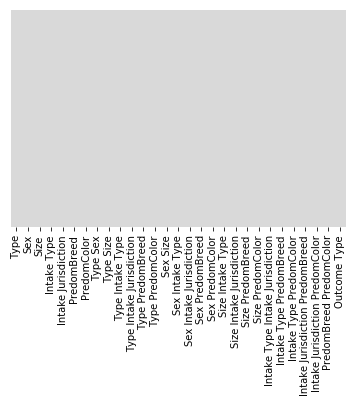

In [33]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [34]:
modeling.to_csv('modeling_data_for_flask.csv')

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(modeling.drop('Outcome Type', axis=1), modeling['Outcome Type'], test_size=0.2, random_state=42)

# Models

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [39]:
d['Outcome Type'].inverse_transform([0,1,2,3])

array(['ADOPTION', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER'],
      dtype=object)

## XGBoosted

In [40]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
xgb = XGBClassifier(objective='multi:softmax',booster='gbtree',colsample_bytree=0.3,learning_rate=0.2, 
                    reg_lambda=1)

### Without Upsampling

In [42]:
params_xgb = dict(max_depth=[3,5,10],n_estimators=[50,100,150])

In [45]:
rs_xgb = RandomizedSearchCV(xgb, params_xgb, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [46]:
rs_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.5min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 150]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=10)

In [47]:
rs_xgb.best_params_

{'n_estimators': 50, 'max_depth': 5}

In [48]:
pred_train_xgb = rs_xgb.best_estimator_.predict(X_train)
pred_test_xgb = rs_xgb.best_estimator_.predict(X_test)

In [49]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_xgb))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgb))

Accuracy train:  0.6706418533991645
Accuracy test:  0.6455042527339003


Text(42.0, 0.5, 'True Label')

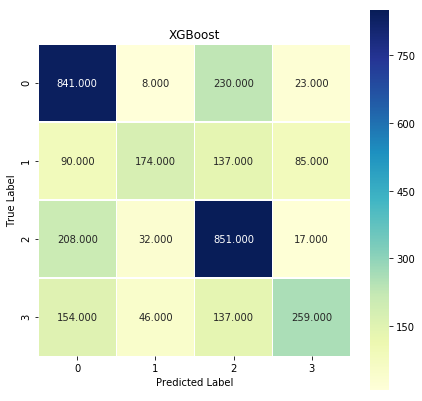

In [50]:
cm_xgb = confusion_matrix(y_test, pred_test_xgb)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [51]:
rs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
model_pickle_path = 'xgboost_model.pkl'

# Create an variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
pickle.dump(rs_xgb, model_pickle)
model_pickle.close()